In [ ]:
pip install xlsxwriter

In [ ]:
import numpy as np
import pandas as pd 
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam, Nadam, RMSprop
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import xlsxwriter

Total Data : 6990
negatif : 503
positif : 3060
netral : 3427


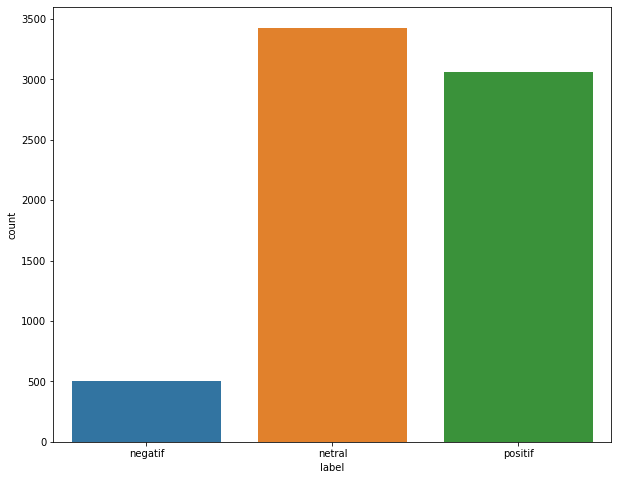

In [ ]:
data = pd.read_excel("/content/labeled.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

negatif = data.loc[data['label'] == 'negatif', 'tweet'].copy().reset_index(drop=True)
positif = data.loc[data['label'] == 'positif', 'tweet'].copy().reset_index(drop=True)
netral = data.loc[data['label'] == 'netral', 'tweet'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("negatif :", len(negatif))
print("positif :", len(positif))
print("netral :", len(netral))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [ ]:
data["label"].value_counts()

netral     3427
positif    3060
negatif     503
Name: label, dtype: int64

In [ ]:
count_class_0_sent, count_class_1_sent, count_class_2_sent = data.label.value_counts()
data_class_0_sent = data[data['label'] == "netral"]
data_class_1_sent = data[data['label'] == "positif"]
data_class_2_sent = data[data['label'] == "negatif"]


Random over-sampling:
positif    3000
netral     3000
negatif    1500
Name: label, dtype: int64


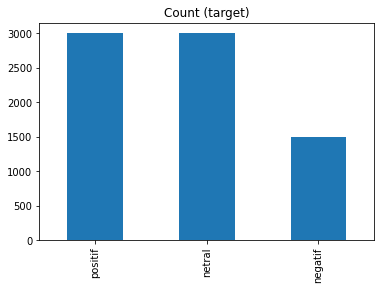

In [ ]:
data_class_0_over_sent = data_class_0_sent.sample(3000, replace=True, random_state=1)
data_class_1_over_sent = data_class_1_sent.sample(3000, replace=True, random_state=1)
data_class_2_over_sent = data_class_2_sent.sample(1500, replace=True, random_state=1)
data_test_over_sent = pd.concat([data_class_0_over_sent, data_class_1_over_sent, data_class_2_over_sent ], axis=0)

print('Random over-sampling:')
print(data_test_over_sent.label.value_counts())

data_test_over_sent.label.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, GRU, Bidirectional
from keras.callbacks import EarlyStopping
from keras import initializers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cols_sent = ['label','after stopword']
d_sent = data_test_over_sent[cols_sent]
d_sent = d_sent[d_sent['after stopword'].notnull()]

In [ ]:
d_sent.reset_index(drop=True,inplace=True)
x_sent = d_sent.iloc[:, 1].values
y_sent = d_sent.iloc[:, 0].values
print(np.unique(y_sent, return_counts=True))

(array(['negatif', 'netral', 'positif'], dtype=object), array([1500, 3000, 3000]))


In [ ]:
y_sent[1]

'netral'

In [ ]:
y_sent[4000]

'positif'

In [ ]:
y_sent[6500]

'negatif'

In [ ]:
from tensorflow.keras import utils as np_utils

In [ ]:
tk_sent = Tokenizer()

In [ ]:
text_sent = d_sent['after stopword'].values
maxlen_sent = max([len(i.split()) for i in text_sent])
tk_sent.fit_on_texts(text_sent) 
x_sent = tk_sent.texts_to_sequences(x_sent) 
x_sent = sequence.pad_sequences(x_sent, maxlen_sent, padding="post") 
vocab_sent = 48805
print(x_sent)

[[ 760 2432 1373 ...    0    0    0]
 [3291 4782  587 ... 1599    0    0]
 [3293  624    1 ...    0    0    0]
 ...
 [1829    4  193 ...    0    0    0]
 [  14    1    0 ...    0    0    0]
 [1366 1367    0 ...    0    0    0]]


In [ ]:
print("vocab sentiment : " + str(vocab_sent))
print("maxlen sentiment : " + str(maxlen_sent))

vocab sentiment : 48805
maxlen sentiment : 23


In [ ]:
from tensorflow.keras import utils as np_utils

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y_sent = LabelEncoder()
y_sent = labelencoder_Y_sent.fit_transform(y_sent)
print(y_sent)
print(np.unique(y_sent, return_counts=True))

[1 1 1 ... 0 0 0]
(array([0, 1, 2]), array([1500, 3000, 3000]))


In [ ]:
from tensorflow.keras import utils as np_utils
y_sent = np_utils.to_categorical(y_sent, num_classes= 3)
# One hot encoded
print(y_sent)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train_sent, x_test_sent, y_train_sent, y_test_sent, indices_train_sent, indices_test_sent = train_test_split(x_sent, y_sent, d_sent.index, test_size=0.2, random_state=42)

print(x_train_sent.shape)
print(y_train_sent.shape)
print(x_test_sent.shape)
print(y_test_sent.shape)
print(y_sent)

(6000, 23)
(6000, 3)
(1500, 23)
(1500, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
x_train_sent = sequence.pad_sequences(x_train_sent, maxlen=maxlen_sent, padding="post")
x_test_sent = sequence.pad_sequences(x_test_sent, maxlen=maxlen_sent, padding="post")
print('x_train_sent shape:', x_train_sent.shape)
print('x_test_sent shape:', x_test_sent.shape)

x_train_sent shape: (6000, 23)
x_test_sent shape: (1500, 23)


In [ ]:
text = data['after stopword'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [ ]:
vocab = 48805

In [ ]:
vocab

48805

In [ ]:
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) 

In [ ]:
def get_model(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 200, input_length = 23, embeddings_initializer = initializer))
    model.add(Bidirectional(LSTM(64, recurrent_initializer = initializer, 
                                 kernel_initializer = initializer, recurrent_dropout=0.1,
                                 dropout=0.2, return_sequences =  False, activation = "tanh")))

    model.add(Dense(32, activation = "tanh", kernel_initializer = initializer)) 
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax', kernel_initializer = initializer)) 
    adam = Adam(lr=0.00005)

    model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
    print(model.summary())
    
    return model

In [ ]:
model = get_model(x_train_sent, y_train_sent)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 23, 200)           9761000   
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 128)               135680    
_________________________________________________________________
dense_44 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 99        
Total params: 9,900,907
Trainable params: 9,900,907
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train_sent, y_train_sent, batch_size=64, epochs=50, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
75/75 [==============================] - 24s 224ms/step - loss: 1.0978 - accuracy: 0.4061 - val_loss: 1.0944 - val_accuracy: 0.4158
Epoch 2/50
75/75 [==============================] - 15s 196ms/step - loss: 1.0923 - accuracy: 0.4163 - val_loss: 1.0716 - val_accuracy: 0.4158
Epoch 3/50
75/75 [==============================] - 15s 197ms/step - loss: 1.0651 - accuracy: 0.4009 - val_loss: 1.0456 - val_accuracy: 0.4158
Epoch 4/50
75/75 [==============================] - 16s 207ms/step - loss: 1.0540 - accuracy: 0.4018 - val_loss: 1.0390 - val_accuracy: 0.4158
Epoch 5/50
75/75 [==============================] - 14s 193ms/step - loss: 1.0447 - accuracy: 0.3911 - val_loss: 1.0280 - val_accuracy: 0.4158
Epoch 6/50
75/75 [==============================] - 14s 193ms/step - loss: 1.0290 - accuracy: 0.4037 - val_loss: 0.9982 - val_accuracy: 0.4175
Epoch 7/50
75/75 [==============================] - 14s 192ms/step - loss: 0.9847 - accuracy: 0.4161 - val_loss: 0.8955 - val_accuracy: 0.5283

In [ ]:
_, acc = model.evaluate(x_test_sent, y_test_sent, verbose=0)
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 84.87 %


In [ ]:
new_review_category = model.predict_classes(x_test_sent)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
decode_sent = np.argmax(y_test_sent, axis=1)

In [ ]:
lab_sent = ["negatif","netral","positif"]

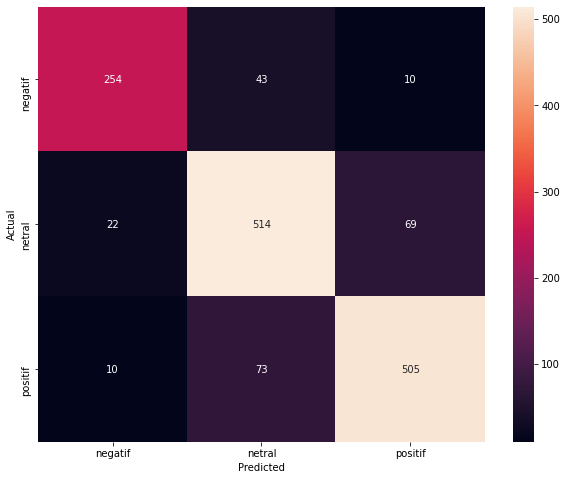

In [ ]:
from sklearn.metrics import confusion_matrix
def conf_matrix(Y_act, Y_pred, lab):
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

conf_matrix(new_review_category, decode_sent, lab_sent)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category, decode_sent)

0.8486666666666667

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category, decode_sent))
print('F1 score:', f1_score(new_review_category, decode_sent, average='macro'))
print('Recall:', recall_score(new_review_category, decode_sent, average='macro'))
print('Precision:', precision_score(new_review_category, decode_sent, average='macro'))

Accuracy: 0.8486666666666667
F1 score: 0.8502748178420375
Recall: 0.8452639592641286
Precision: 0.856236977127388


In [ ]:
accr_sent = model.evaluate(x_test_sent,y_test_sent)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_sent[0],accr_sent[1]))

47/47 [==============================] - 1s 11ms/step - loss: 0.4808 - accuracy: 0.8487
Test set
  Loss: 0.481
  Accuracy: 0.849


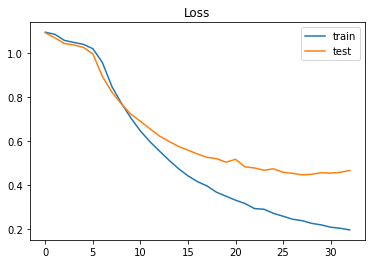

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

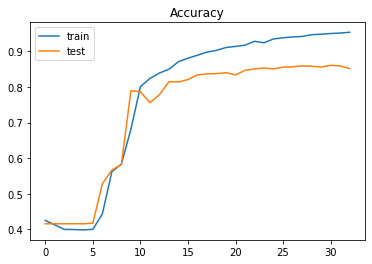

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
model.save('/content/labeling sentimen 8487 fix2.h5')

# Labeling Data

In [ ]:
unlabeled = pd.read_csv("/content/tanggal 16 after dupp.csv")

In [ ]:
un_text = unlabeled['after stopword'].values

In [ ]:
un_text

array(['kapolda jawa timur irjen pol nico afrinta mengungkapkan memaksa putar balik sedikitnya kendaraan',
       'mau posting foto keluarga pas lebaran sebagian orang keluarganya enggak lengkap atau enggak bisa mudik',
       'doang keluarga gue tahun enggak pada mudik byeee', ...,
       'mengira gabener rupanya benar liburnya dipotong dong karena lebarannya gaboleh mudik',
       'total kendaraan diputar balik sebanyak unit periode mei atau hari kebijakan larangan mud',
       'magic com antena awas dicariin punya'], dtype=object)

In [ ]:
cols = ['after stopword']
d_aspect = unlabeled[cols]

d_aspect=d_aspect[d_aspect['after stopword'].notnull()]
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.values
x_aspect = d_aspect.iloc[:, 0].values

In [ ]:
d_aspect

,after stopword
0,kapolda jawa timur irjen pol nico afrinta meng...
1,mau posting foto keluarga pas lebaran sebagian...
2,doang keluarga gue tahun enggak pada mudik byeee
3,ngeeeen urg teu bisa mudik tempat wisata pinuh...
4,terus preinternship jadi online enggak bisa of...
...,...
7705,plus sushow candu kalo menonton pasti bakalan ...
7706,duta mudik wkwk
7707,mengira gabener rupanya benar liburnya dipoton...
7708,total kendaraan diputar balik sebanyak unit pe...


In [ ]:
x_aspect

array(['kapolda jawa timur irjen pol nico afrinta mengungkapkan memaksa putar balik sedikitnya kendaraan',
       'mau posting foto keluarga pas lebaran sebagian orang keluarganya enggak lengkap atau enggak bisa mudik',
       'doang keluarga gue tahun enggak pada mudik byeee', ...,
       'mengira gabener rupanya benar liburnya dipotong dong karena lebarannya gaboleh mudik',
       'total kendaraan diputar balik sebanyak unit periode mei atau hari kebijakan larangan mud',
       'magic com antena awas dicariin punya'], dtype=object)

In [ ]:
d_aspect.replace('', np.nan, inplace=True)
d_aspect.dropna(inplace=True)

d_aspect.reset_index(drop=True,inplace=True)

x_aspect = d_aspect.values

len(x_aspect)

7710

In [ ]:
x_aspect

array([['kapolda jawa timur irjen pol nico afrinta mengungkapkan memaksa putar balik sedikitnya kendaraan'],
       ['mau posting foto keluarga pas lebaran sebagian orang keluarganya enggak lengkap atau enggak bisa mudik'],
       ['doang keluarga gue tahun enggak pada mudik byeee'],
       ...,
       ['mengira gabener rupanya benar liburnya dipotong dong karena lebarannya gaboleh mudik'],
       ['total kendaraan diputar balik sebanyak unit periode mei atau hari kebijakan larangan mud'],
       ['magic com antena awas dicariin punya']], dtype=object)

In [ ]:
tokenizer = Tokenizer()
text_aspect = d_aspect['after stopword'].values
maxlen_aspect = 23
tokenizer.fit_on_texts(un_text)

In [ ]:
x_aspect = tokenizer.texts_to_sequences(un_text)
x_aspect = sequence.pad_sequences(x_aspect, 23, padding="post")
vocab_aspect = 48805

In [ ]:
text1 = tokenizer.texts_to_sequences(un_text)
text1 = pad_sequences(text1, maxlen=23, padding="post")

In [ ]:
text1

array([[  786,   296,   373, ...,     0,     0,     0],
       [   11,  3200,   514, ...,     0,     0,     0],
       [  229,    37,    21, ...,     0,     0,     0],
       ...,
       [  835,  4941,  4279, ...,     0,     0,     0],
       [ 1000,   130,   562, ...,     0,     0,     0],
       [11498, 11499, 11500, ...,     0,     0,     0]], dtype=int32)

In [ ]:
pred_label = model.predict(text1)
label1 = np.argmax(pred_label, axis = 1) 

In [ ]:
pred_label

array([[0.45354012, 0.4659188 , 0.0805411 ],
       [0.00639177, 0.03815189, 0.9554564 ],
       [0.03438633, 0.19838558, 0.76722807],
       ...,
       [0.021191  , 0.6642546 , 0.31455433],
       [0.00630432, 0.03858992, 0.9551058 ],
       [0.01987781, 0.88781923, 0.09230287]], dtype=float32)

In [ ]:
label1

array([1, 2, 2, ..., 1, 2, 1])

In [ ]:
workbook = xlsxwriter.Workbook('/content/tanggal 16 after dup labeled sent.xlsx')
worksheet = workbook.add_worksheet()

row = 0
col = 0

rowHeaders = ['tweet', 'label']
worksheet.write_row(row, col,  tuple(rowHeaders))


for i in un_text:
    tweet = i
    rowValues = [tweet]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))

row = 0
for l in label1:
    label = l
    rowValues = [label]
    row += 1 
    worksheet.write_row(row, col + 1, tuple(rowValues))

workbook.close()